<a href="https://colab.research.google.com/github/dantefleschpereira/ml_covid/blob/main/ml11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

#### Análise Exploratória de Dados

In [293]:
df = pd.read_excel('dataset_obito.xlsx')

In [294]:
df.head(15)

,idade,sexo,raca,tagabismo,comorbidade1,comorbidade2,comorbidade3,comorbidade4,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,antibiotico1,antibiotico2,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,8.0,0,4830,0.76,36.0,0,nao,leve
1,77,F,branca,sim,HAS,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,14.7,0,5280,0.82,31.0,0,nao,assintom
2,67,M,branca,previo,HAS,DM,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,0.0,0,8650,0.72,0.0,0,nao,leve
3,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,prednisona 20mg,nenhum,nenhum,Sim,nenhum,nenhum,Nao,NaN,NaN,6.2,0,9590,0.00,142.0,0,nao,leve
4,51,M,branca,nao,HAS,renal-hd,nenhum,nenhum,nenhum,0,"denenhumametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,Nao,nenhum,nenhum,Nao,NaN,NaN,32.0,0,4230,15.40,158.0,1535,sim,assintom
5,64,F,branca,nao,HAS,nenhuma,nenhum,nenhum,nenhum,0,nenhum,nenhum,nenhum,Nao,"heparina 5000UI/0,25mL",nenhum,Sim,NaN,NaN,4.1,1530,6430,1.00,52.0,0,nao,leve
6,38,M,preta,nao,renal-hd,nenhuma,nenhum,nenhum,nenhum,0,hidrocortisona 100mg,prednisona 20mg,nenhum,Sim,"heparina 5000UI/0,25mL",nenhum,Nao,NaN,NaN,19.3,2380,1260,7.35,191.0,1021,nao,leve
7,37,M,branca,sim,HIV,oncologico,nenhum,nenhum,TVP,0,tiamina 300mg,piridonenhumina 40mg,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,4.8,0,4410,0.68,31.0,437,nao,leve
8,82,F,branca,nao,HAS,oncologico,nenhum,nenhum,nenhum,1,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL",nenhum,Sim,NaN,NaN,0.0,0,0,0.00,0.0,0,nao,assintom
9,45,M,branca,nao,nenhuma,nenhuma,nenhum,nenhum,ambos,0,nenhum,nenhum,nenhum,Nao,"enonenhumaparina 40mg/0,4mL","enonenhumaparina 60mg/0,6mL",Sim,NaN,NaN,17.2,366,2790,1.08,22.0,0,nao,leve


Valores Vazios
- Deletar linhas/colunas vazias
- Deletar linhas que possuem valores vazios
- Preencher valores vazios (último valor)

In [295]:
# deletar linhas e colunas completamente vazias
# df = df.dropna(how='all', axis=1)

# deletar linhas que possuem pelo menos 1 valor vazio
# df = df.dropna()

In [296]:
# preencher com o último valor
df = df.ffill()

In [297]:
# deletar colunas incompletas
df = df.drop(columns='antibiotico1')
df = df.drop(columns='antibiotico2')


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idade                     429 non-null    int64  
 1   sexo                      429 non-null    object 
 2   raca                      429 non-null    object 
 3   tagabismo                 429 non-null    object 
 4   comorbidade1              429 non-null    object 
 5   comorbidade2              429 non-null    object 
 6   comorbidade3              429 non-null    object 
 7   comorbidade4              429 non-null    object 
 8   trombo_na_internacao      429 non-null    object 
 9   desfecho                  429 non-null    int64  
 10  anti-inflamatorio1        429 non-null    object 
 11  anti-inflamatorio2        429 non-null    object 
 12  anti-inflamatorio3        429 non-null    object 
 13  anti-inflamatorio_previo  429 non-null    object 
 14  profilaxia

In [299]:
view_comorbidade_desfecho = df[['comorbidade1','comorbidade2','comorbidade3','comorbidade4', 'desfecho']]
display(view_comorbidade_desfecho)

,comorbidade1,comorbidade2,comorbidade3,comorbidade4,desfecho
0,nenhuma,nenhuma,nenhum,nenhum,0
1,HAS,nenhuma,nenhum,nenhum,0
2,HAS,DM,nenhum,nenhum,0
3,HAS,renal-hd,nenhum,nenhum,0
4,HAS,renal-hd,nenhum,nenhum,0
...,...,...,...,...,...
424,HAS,nenhuma,nenhum,nenhum,0
425,nenhuma,nenhuma,nenhum,nenhum,0
426,DM,HAS,nenhum,nenhum,0
427,HAS,ICC,nenhum,nenhum,0


In [300]:
# DESFECHO (1-alta/ 2-UTI/ 3-óbito/4-fim isolamento/5-transf.)

#### Atributos escolhidos: 

In [301]:
nomes_atributos_numericos = ['idade','proteina c (mg/dl)','ferritina (ng/ml)','leucócitos ( /ul)','creatinina (mg/dl)','ureia(mg/dl)','d-dimeros (ng/ml)']

In [302]:
nomes_atributos_numericos

['idade',
 'proteina c (mg/dl)',
 'ferritina (ng/ml)',
 'leucócitos ( /ul)',
 'creatinina (mg/dl)',
 'ureia(mg/dl)',
 'd-dimeros (ng/ml)']

In [303]:
nomes_atributos_categoricos = ['sexo','sintomas','raca','tagabismo','comorbidade1','comorbidade2','comorbidade3','comorbidade4','trombo_na_internacao','sintomas','anti-inflamatorio_previo','anticoagulante_previo','reinfeccao']

In [304]:
nomes_atributos_categoricos

['sexo',
 'sintomas',
 'raca',
 'tagabismo',
 'comorbidade1',
 'comorbidade2',
 'comorbidade3',
 'comorbidade4',
 'trombo_na_internacao',
 'sintomas',
 'anti-inflamatorio_previo',
 'anticoagulante_previo',
 'reinfeccao']

In [305]:
df['desfecho'].value_counts()

0    382
1     47
Name: desfecho, dtype: int64

#### Pré-Processamento

#### Separando os conjuntos de treino e teste

In [306]:
from sklearn.model_selection import train_test_split

# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['desfecho'].copy()
df_treino        = df_treino.drop(columns='desfecho')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['desfecho'].copy()
df_teste        = df_teste.drop(columns='desfecho')

In [307]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

# pre-processamento da coluna alvo para treino
y_treino = df_treino_labels.values == 1

# pre-processamento da coluna alvo para teste
y_teste = df_teste_labels.values == 1

In [308]:
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [309]:
# usar técnica under-sampling
# Under-sampling: reduz o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências
rus = RandomUnderSampler()
X_treino, y_treino = rus.fit_resample(X_treino, y_treino)


In [310]:
# ver o balanceamento das classes
print(pd.Series(y_treino).value_counts())


False    39
True     39
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


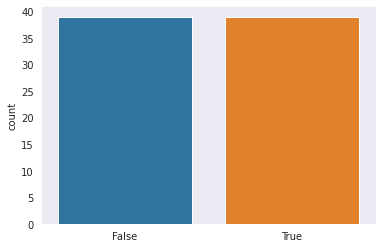

In [311]:
# plotar a nova distribuição de classes
sns.countplot(y_treino);

In [312]:
import tensorflow as tf
from tensorflow import keras

In [313]:
X_treino

array([[ 1.67247766,  0.71157376, -0.27504492, ...,  1.        ,
         1.        ,  0.        ],
       [-1.02378805,  0.31675767, -0.27504492, ...,  0.        ,
         1.        ,  0.        ],
       [-1.37547488, -0.42696567, -0.27504492, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.85187505, -0.96869008, -0.27504492, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.7897066 ,  0.31675767, -0.27504492, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.08988692, -0.96869008, -0.27504492, ...,  0.        ,
         1.        ,  0.        ]])

In [314]:
X_treino.shape

(78, 60)

In [315]:
y_treino.shape

(78,)

In [316]:
X_teste.shape

(86, 60)

In [317]:
y_teste.shape

(86,)

- RNA TensorFlow + Keras

In [318]:
import tensorflow as tf
from tensorflow import keras

In [319]:
# Qual o tamanho da entrada?
X_treino.shape[1:]

(60,)

In [320]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation="relu",input_shape=X_treino.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [321]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                1952      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2,514
Trainable params: 2,514
Non-trainable params: 0
_________________________________________________________________


In [322]:
# Para modelos de classificação com saída esparsa:    # para classificação com saída densa  # para classificação binária:     
model.compile(loss="sparse_categorical_crossentropy", # usar categorical_crossentropy       # usar binary_crossentropy e mudar
              optimizer="sgd",                        #                                     # a ativação da camada de saída
              metrics=["accuracy"])                   #                                     # para sigmoid


In [323]:
# Early Stopping (optimization technique used to reduce overfitting)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

#### Treinamento do modelo

In [324]:
history = model.fit(X_treino, y_treino, epochs=150, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/150
2/2 [==============================] - 1s 188ms/step - loss: 0.7066 - accuracy: 0.4839 - val_loss: 0.9234 - val_accuracy: 0.1250
Epoch 2/150
2/2 [==============================] - 0s 29ms/step - loss: 0.7000 - accuracy: 0.5000 - val_loss: 0.9405 - val_accuracy: 0.1250
Epoch 3/150
2/2 [==============================] - 0s 26ms/step - loss: 0.6930 - accuracy: 0.5323 - val_loss: 0.9578 - val_accuracy: 0.1250
Epoch 4/150
2/2 [==============================] - 0s 32ms/step - loss: 0.6866 - accuracy: 0.5484 - val_loss: 0.9725 - val_accuracy: 0.1250
Epoch 5/150
2/2 [==============================] - 0s 32ms/step - loss: 0.6810 - accuracy: 0.5484 - val_loss: 0.9876 - val_accuracy: 0.1250
Epoch 6/150
2/2 [==============================] - 0s 40ms/step - loss: 0.6756 - accuracy: 0.5806 - val_loss: 1.0007 - val_accuracy: 0.0625


#### Avaliação da evolução do treinamento

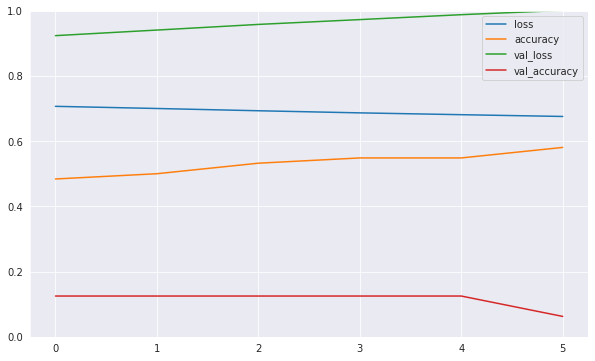

In [325]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Avaliação do desempenho do modelo treinado

In [326]:
y_previsto_rna_proba = model.predict(X_teste)

In [327]:
np.round(y_previsto_rna_proba,decimals=2)

array([[0.51, 0.49],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.58, 0.42],
       [0.36, 0.64],
       [0.52, 0.48],
       [0.64, 0.36],
       [0.44, 0.56],
       [0.65, 0.35],
       [0.53, 0.47],
       [0.5 , 0.5 ],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.47, 0.53],
       [0.58, 0.42],
       [0.36, 0.64],
       [0.61, 0.39],
       [0.45, 0.55],
       [0.56, 0.44],
       [0.62, 0.38],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.56, 0.44],
       [0.42, 0.58],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.63, 0.37],
       [0.46, 0.54],
       [0.34, 0.66],
       [0.45, 0.55],
       [0.5 , 0.5 ],
       [0.39, 0.61],
       [0.58, 0.42],
       [0.62, 0.38],
       [0.7 , 0.3 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.78, 0.22],
       [0.4 , 0.6 ],
       [0.58, 0.42],
       [0.66, 0.34],
       [0.61, 0.39],
       [0.42, 0.58],
       [0.5 ,

In [328]:
# Treinamento de uma árvore de decisão com sua indução restrita a dois níveis

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_treino, y_treino)

y_pred = tree_clf.predict(X_teste)

print("Acurácia: ", accuracy_score(y_teste,y_pred))
print("Precisão: ", precision_score(y_teste,y_pred))
print("Recall:   ", recall_score(y_teste,y_pred))
print("F1 Score: ", f1_score(y_teste,y_pred))

Acurácia:  0.7093023255813954
Precisão:  0.18518518518518517
Recall:    0.625
F1 Score:  0.2857142857142857
